# **PROJETO MÉDIA MÓVEL**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

## **Análise e Tratamento Inicial**

Devemos sempre carregar os dados
Verificar o tamanho da base
Identificar o tipo de dados de cada variável

In [3]:
covid = pd.read_csv('dados_covid_sp.csv',sep=';')

Verificando a base de dados carregada

In [4]:
covid.head(20)

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9
5,Águas de Santa Bárbara,3500550,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Bauru,12,5931,1106,40446,0,8.0,"-22,8812","-49,2421",9
6,Águas de São Pedro,3500600,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Piracicaba,11,3122,764,361,0,8.0,"-22,5977","-47,8734",9
7,Agudos,3500709,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Bauru,12,36134,5524,96671,0,8.0,"-22,4694","-48,9863",9
8,Alambari,3500758,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Sorocaba,6,5779,830,1596,0,8.0,"-23,5503","-47,8980",9
9,Alfredo Marcondes,3500808,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Presidente Prudente,2,3927,907,11892,0,8.0,"-21,9527","-51,4140",9


Dimensão da Base

In [5]:
covid.shape

(323000, 26)

Análise dos tipos de atributos.

object: strings

int64: inteiros

float64: reais

complex: complexos

In [6]:
covid.dtypes

nome_munic        object
codigo_ibge        int64
dia                int64
mes                int64
datahora          object
casos              int64
casos_novos        int64
casos_pc          object
casos_mm7d        object
obitos             int64
obitos_novos       int64
obitos_pc         object
obitos_mm7d       object
letalidade        object
nome_ra           object
cod_ra             int64
nome_drs          object
cod_drs            int64
pop                int64
pop_60             int64
area               int64
map_leg           object
map_leg_s        float64
latitude          object
longitude         object
semana_epidem      int64
dtype: object

Observe que a variavel do numero de casos 7 d - média movel (casos_mm7d) e numero de óbitos 7 d - média movel (obitos_mm7d)
estão como objeto (caracteres), devemos subtituir o ponto por vírgula e transformá-las como variáveis numéricas

In [7]:
# Substituir as vírgulas por pontos
covid['casos_mm7d'] = covid['casos_mm7d'].str.replace(',', '.')
covid

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.000000000000000,0,...,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.000000000000000,0,...,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.000000000000000,0,...,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.000000000000000,0,...,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.000000000000000,0,...,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322995,Ignorado,9999999,4,7,2021-07-04,994,-41,"0,00000000000000e+00",1.857142857142857,58,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",27
322996,Ignorado,9999999,5,7,2021-07-05,971,-23,"0,00000000000000e+00",3.714285714285714,51,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",27
322997,Ignorado,9999999,6,7,2021-07-06,965,-6,"0,00000000000000e+00",-14.428571428571429,8,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",27
322998,Ignorado,9999999,7,7,2021-07-07,993,28,"0,00000000000000e+00",5.285714285714286,10,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",27


In [8]:
# Transformar String em variável numérica
covid['casos_mm7d'] = pd.to_numeric(covid['casos_mm7d'])

In [9]:
covid['obitos_mm7d'] = covid['obitos_mm7d'].str.replace(',', '.')
covid

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.000000,0,...,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.000000,0,...,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.000000,0,...,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.000000,0,...,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.000000,0,...,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322995,Ignorado,9999999,4,7,2021-07-04,994,-41,"0,00000000000000e+00",1.857143,58,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",27
322996,Ignorado,9999999,5,7,2021-07-05,971,-23,"0,00000000000000e+00",3.714286,51,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",27
322997,Ignorado,9999999,6,7,2021-07-06,965,-6,"0,00000000000000e+00",-14.428571,8,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",27
322998,Ignorado,9999999,7,7,2021-07-07,993,28,"0,00000000000000e+00",5.285714,10,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",27


In [10]:
covid['obitos_mm7d'] = pd.to_numeric(covid['obitos_mm7d'])

In [11]:
covid.dtypes

nome_munic        object
codigo_ibge        int64
dia                int64
mes                int64
datahora          object
casos              int64
casos_novos        int64
casos_pc          object
casos_mm7d       float64
obitos             int64
obitos_novos       int64
obitos_pc         object
obitos_mm7d      float64
letalidade        object
nome_ra           object
cod_ra             int64
nome_drs          object
cod_drs            int64
pop                int64
pop_60             int64
area               int64
map_leg           object
map_leg_s        float64
latitude          object
longitude         object
semana_epidem      int64
dtype: object

In [12]:
covid.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.0,0,...,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.0,0,...,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.0,0,...,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.0,0,...,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.0,0,...,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


In [13]:
covid.shape

(323000, 26)

Verificando a existencia de valores ausentes

In [14]:
covid.isnull().sum()

nome_munic         0
codigo_ibge        0
dia                0
mes                0
datahora           0
casos              0
casos_novos        0
casos_pc           0
casos_mm7d         0
obitos             0
obitos_novos       0
obitos_pc          0
obitos_mm7d        0
letalidade         0
nome_ra          500
cod_ra             0
nome_drs         500
cod_drs            0
pop                0
pop_60             0
area               0
map_leg          500
map_leg_s        500
latitude           0
longitude          0
semana_epidem      0
dtype: int64

Verificando valores missing apenas de uma coluna

In [15]:
covid['obitos'].isnull().sum()

0

In [16]:
covid_sp = covid.loc[covid.nome_munic == 'São Paulo']
covid_sp.head(8)

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
562,São Paulo,3550308,25,2,2020-02-25,1,0,"8,42484114962012e-03",0.000000,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
1207,São Paulo,3550308,26,2,2020-02-26,1,0,"8,42484114962012e-03",0.000000,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
1852,São Paulo,3550308,27,2,2020-02-27,1,0,"8,42484114962012e-03",0.000000,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
2497,São Paulo,3550308,28,2,2020-02-28,2,1,"1,68496822992402e-02",0.000000,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
3142,São Paulo,3550308,29,2,2020-02-29,2,0,"1,68496822992402e-02",0.000000,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
3787,São Paulo,3550308,1,3,2020-03-01,2,0,"1,68496822992402e-02",0.000000,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",10
4432,São Paulo,3550308,2,3,2020-03-02,2,0,"1,68496822992402e-02",0.142857,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",10
5077,São Paulo,3550308,3,3,2020-03-03,2,0,"1,68496822992402e-02",0.142857,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",10


## **Média Móvel Casos Novos**

In [17]:
covid_sp.head(9)

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
562,São Paulo,3550308,25,2,2020-02-25,1,0,"8,42484114962012e-03",0.000000,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
1207,São Paulo,3550308,26,2,2020-02-26,1,0,"8,42484114962012e-03",0.000000,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
1852,São Paulo,3550308,27,2,2020-02-27,1,0,"8,42484114962012e-03",0.000000,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
2497,São Paulo,3550308,28,2,2020-02-28,2,1,"1,68496822992402e-02",0.000000,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
3142,São Paulo,3550308,29,2,2020-02-29,2,0,"1,68496822992402e-02",0.000000,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
3787,São Paulo,3550308,1,3,2020-03-01,2,0,"1,68496822992402e-02",0.000000,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",10
4432,São Paulo,3550308,2,3,2020-03-02,2,0,"1,68496822992402e-02",0.142857,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",10
5077,São Paulo,3550308,3,3,2020-03-03,2,0,"1,68496822992402e-02",0.142857,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",10
5722,São Paulo,3550308,4,3,2020-03-04,3,1,"2,52745234488604e-02",0.285714,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",10


Observe que os primeiros 7 dias estao zerados, pois se trata da média movel simples

Verificando o tamanho da nossa base

In [18]:
covid_sp.shape

(500, 26)

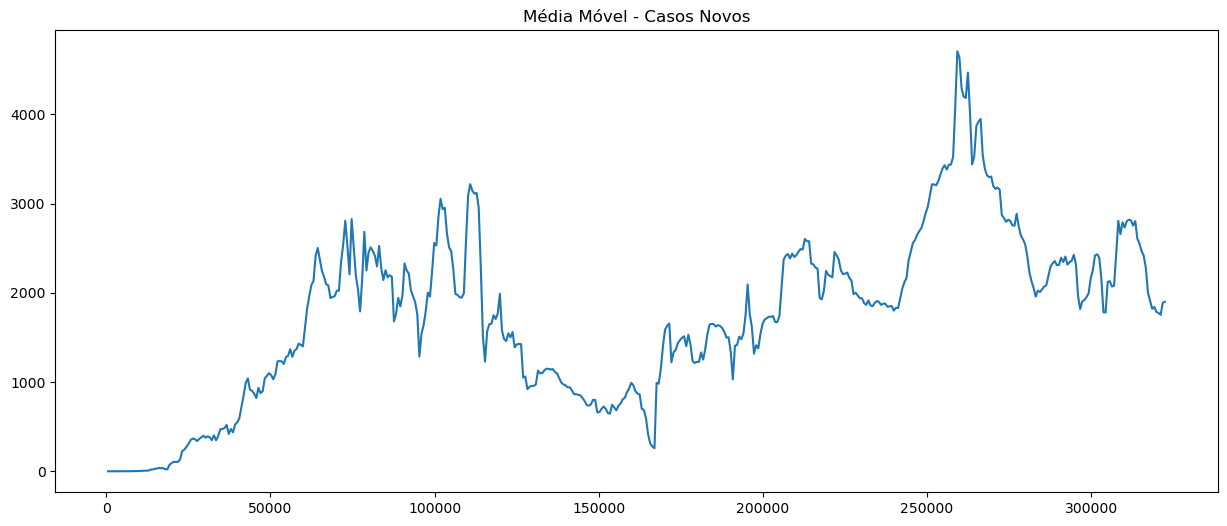

In [19]:
# Média móvel do Dataframe
plt.plot(covid_sp.casos_mm7d)
plt.title('Média Móvel - Casos Novos')
plt.grid(False)
plt.show()

Iremos montar uma nova média móvel - apr aisso vamos criar uma nova série

In [20]:
serie = pd.Series(covid_sp['casos_novos'].values, index = covid_sp['datahora'])
serie

datahora
2020-02-25       0
2020-02-26       0
2020-02-27       0
2020-02-28       1
2020-02-29       0
              ... 
2021-07-04     706
2021-07-05     490
2021-07-06    2619
2021-07-07    2184
2021-07-08    2230
Length: 500, dtype: int64

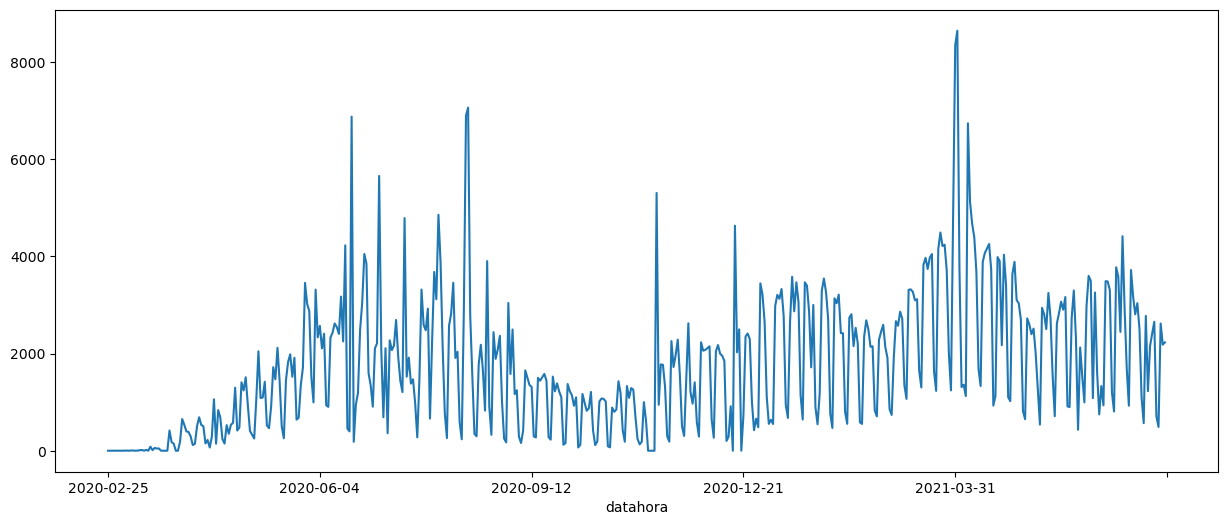

In [21]:
serie.plot();

Criando a média móvel de 7 dias relacionada aos casos novos

In [22]:
media_casos = serie.rolling(window=7,center=True)
media_casos = media_casos.mean()

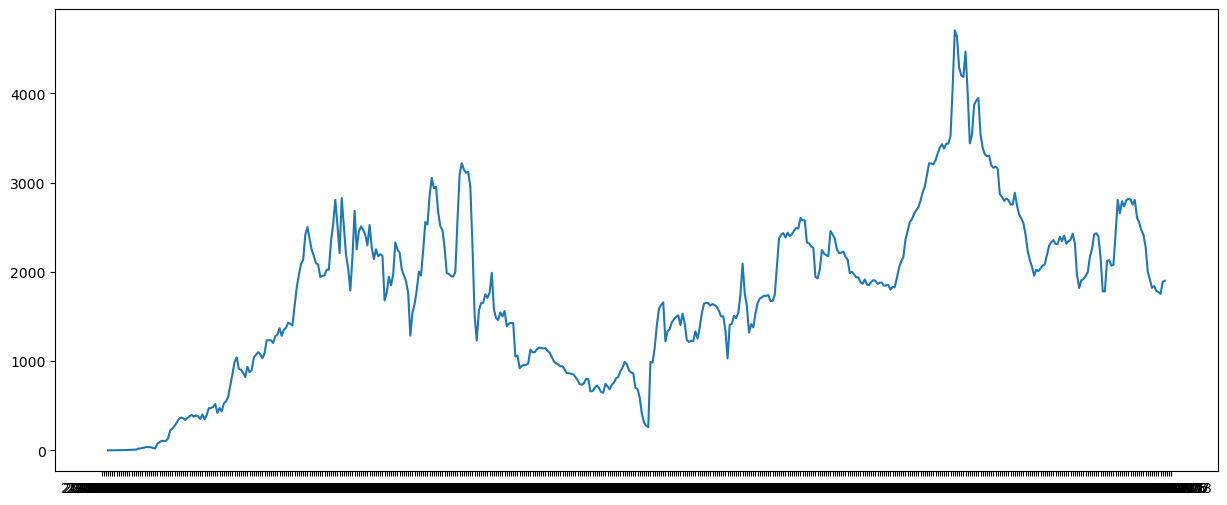

In [23]:
plt.plot(media_casos);

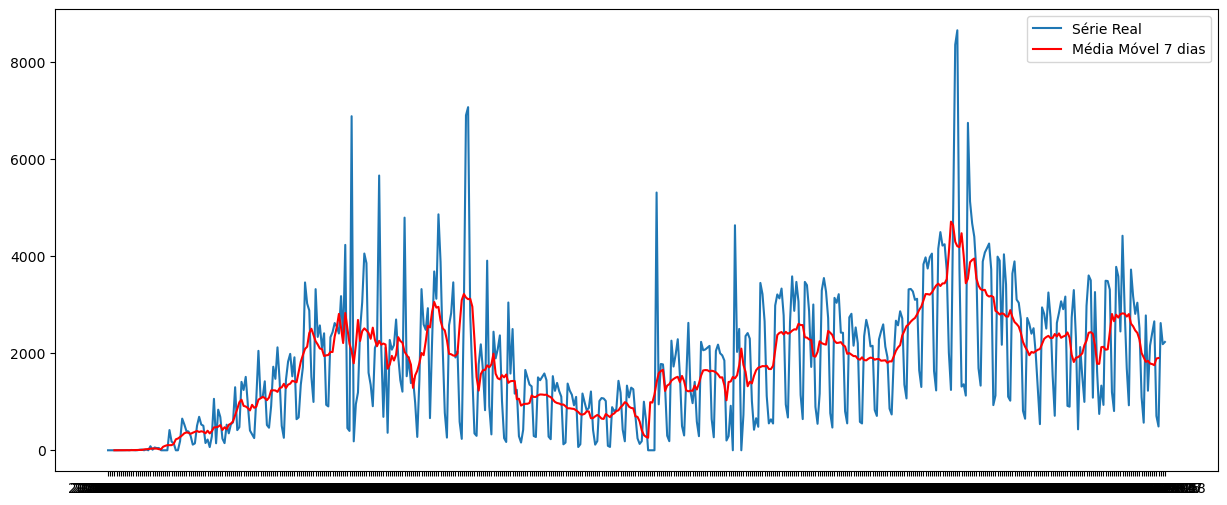

In [24]:
plt.plot(serie, label='Série Real')
plt.plot(media_casos,color='red', label='Média Móvel 7 dias')
plt.legend(loc='best')
plt.show()

## **Média Móvel Óbitos Novos**

Plotando a média móvel dos óbitos novos - disponível na base

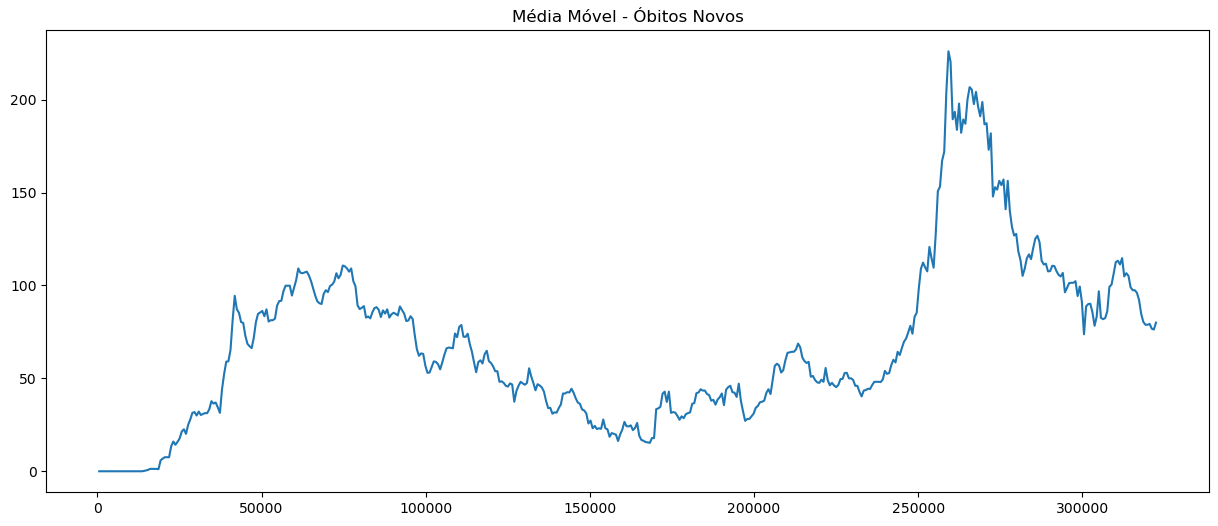

In [25]:
plt.plot(covid_sp.obitos_mm7d)
plt.title('Média Móvel - Óbitos Novos')
plt.grid(False)
plt.show()

Criando a nova serie para calcular a média movel

In [26]:
serie = pd.Series(covid_sp['obitos_novos'].values, index = covid_sp['datahora'])
serie

datahora
2020-02-25      0
2020-02-26      0
2020-02-27      0
2020-02-28      0
2020-02-29      0
             ... 
2021-07-04      8
2021-07-05     14
2021-07-06    136
2021-07-07     88
2021-07-08    119
Length: 500, dtype: int64

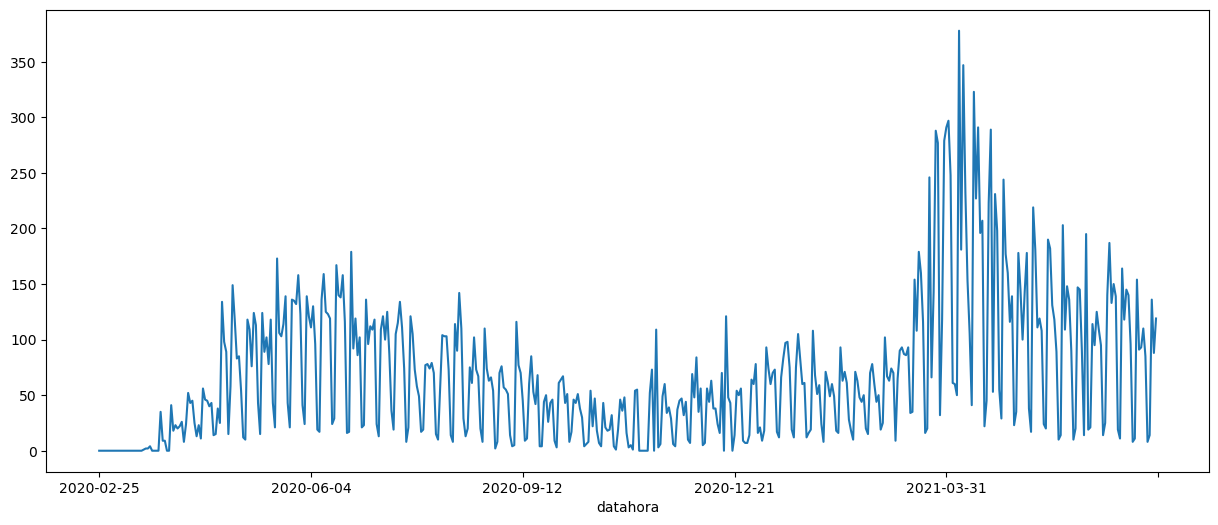

In [27]:
serie.plot();

In [28]:
media_obitos = serie.rolling(window=7, center=True)
media_obitos = media_obitos.mean()

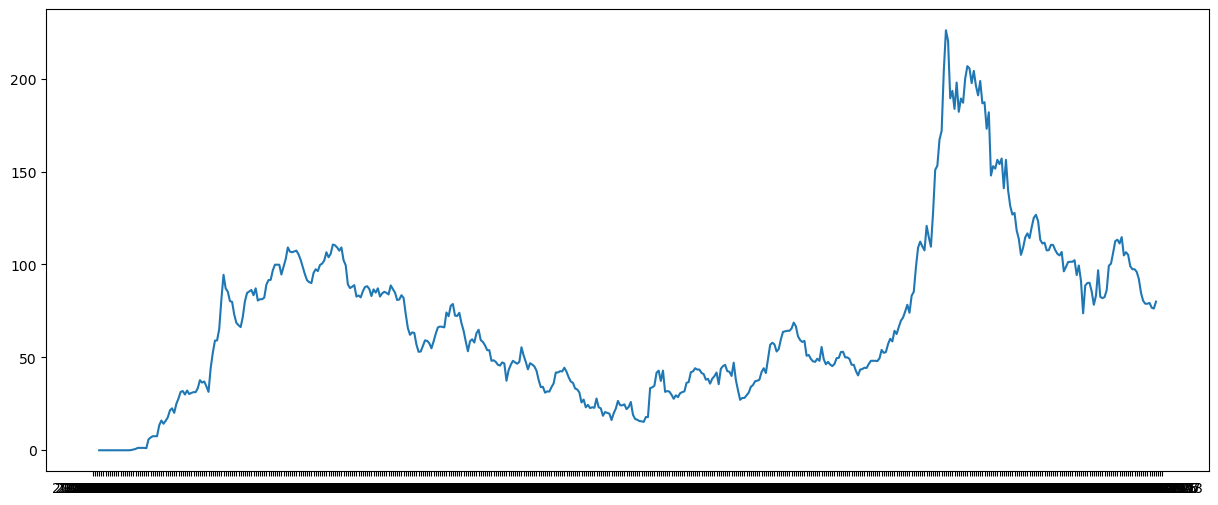

In [29]:
plt.plot(media_obitos);

Plotando as duas séries : real x média móvel simetrica juntas

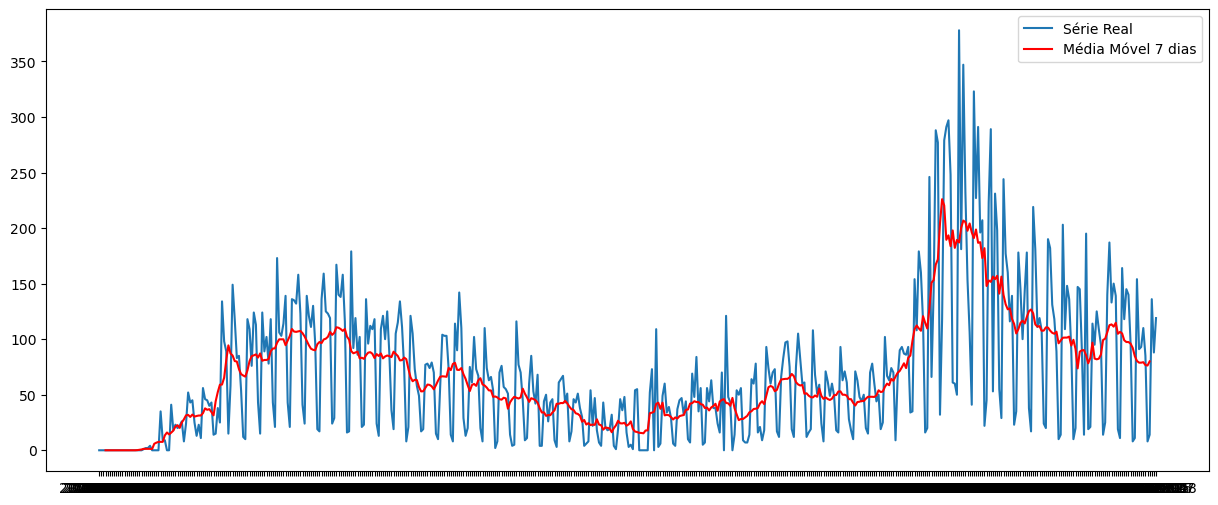

In [30]:
plt.plot(serie, label='Série Real')
plt.plot(media_obitos,color='red', label='Média Móvel 7 dias')
plt.legend(loc='best')
plt.show()